In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

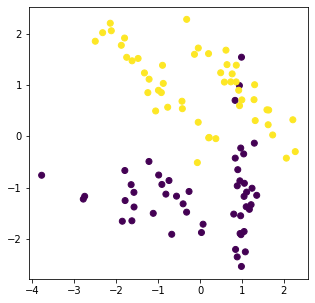

In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2,
                           n_redundant=0, n_informative=2,
                           random_state=1234)
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

#데이터 분할
trn_X, tst_X, trn_y, tst_y = train_test_split(X, y, test_size=0.3, random_state=1234)

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest 학습
T=10 # Tree의 개수

#학습방법1
RF = RandomForestClassifier(n_estimators=T,
                            max_depth=2)
clf = RF.fit(trn_X, trn_y)
clf = RandomForestClassifier(n_estimators=T,
                             max_depth=2).fit(trn_X, trn_y)

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

prd = clf.predict(tst_X)
print("Confusion Matrix \n", confusion_matrix(y_true=tst_y, y_pred = prd))
print(classification_report(y_true=tst_y, y_pred=prd))

Confusion Matrix 
 [[17  0]
 [ 2 11]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



In [8]:
X, y = make_classification(n_samples = 1000, n_features=10,
                           n_informative=3, n_redundant=0,
                           n_repeated=0, n_classes=2, shuffle=2,
                           random_state=1234)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [9]:
trn_X, tst_X, trn_y, tst_y, = train_test_split(X, y, stratify = y, test_size=0.3,
                                               random_state=1234)
print(trn_X.shape, tst_X.shape)

(700, 10) (300, 10)


In [11]:
clf = RandomForestClassifier().fit(trn_X, trn_y)

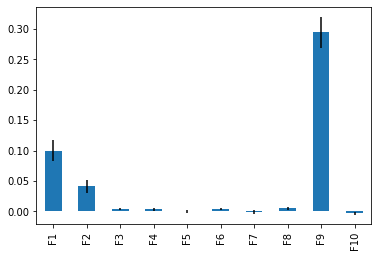

In [14]:
from sklearn.inspection import permutation_importance
import pandas as pd
perm_imp = permutation_importance(clf, tst_X, tst_y,
                                  n_repeats=10, random_state=1234, n_jobs=-1)

feature_names = ['F'+str(i+1) for i in range(X.shape[1])]
perm_imp_df = pd.Series(perm_imp.importances_mean, index=feature_names)

y_err = perm_imp.importances_std

fig, ax = plt.subplots()
perm_imp_df.plot.bar(yerr=y_err, ax=ax)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

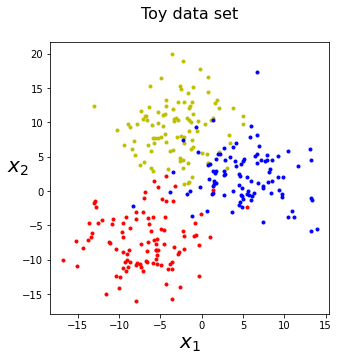

In [15]:
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, n_features=2, centers=3,
                  cluster_std=4, random_state=42)

plt.figure(figsize=(5,5))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", marker='.')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", marker='.')
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "rd", marker='.')
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20, rotation=0)
plt.title("Toy data set\n", fontsize=16)
plt.show

In [17]:
def compute_decision_boundaries(clf, x, y):
    mn_x1, mx_x1 = int(x[:,0].min())-1, int(x[:,0].max()+1)
    mn_x2, mx_x2 = int(x[:,1].min())-1, int(x[:,1].max()+1)
    x1s = np.linspace(mn_x1, mx_x1, 300)
    x2s = np.linspace(mn_x1, mx_x2, 300)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    axes = [mn_x1, mx_x1, mn_x2, mx_x2]
    return x1, x2, y_pred, axes

def plot_feature_space(clf, x, y):
    x1, x2, y_pred, axes = compute_decision_boundaries(clf, x, y)
    custom_cmap = ListedColormap(['y','b','r'])
    plt.figure(figsize=(5, 5))
    plt.contourf(x1, x2, y_pred, cmap=custom_cmap, alpha=0.1)
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "yo", marker='.')
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs", marker='.')
    plt.plot(x[:, 0][y==2], x[:, 1][y==2], "rd", marker='.')
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.show()

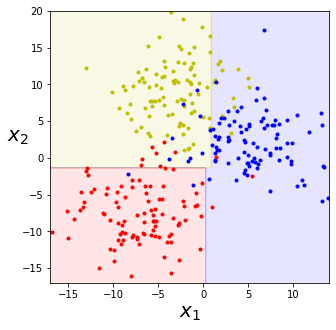

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(max_depth=2).fit(X,y)
plot_feature_space(clf_dt, X, y)

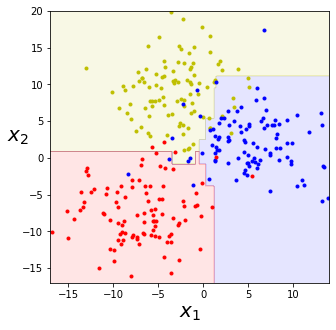

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf_rf10 = RandomForestClassifier(max_depth=2, n_estimators=10).fit(X, y)
plot_feature_space(clf_rf10, X, y)

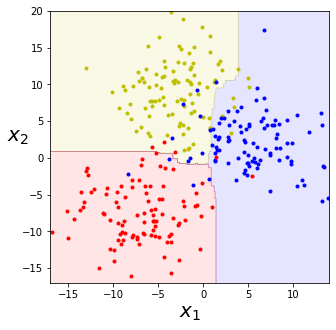

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf_rf10 = RandomForestClassifier(max_depth=2, n_estimators=1000).fit(X, y)
plot_feature_space(clf_rf10, X, y)